In [2]:
#working with a larger example, multiclass classification

#when you have more than two classes as an option its known as multiclass classification.
#this means three different classes is multiclass classification, or if you have 100 different classes its multiclass classification

#same steps in modeling with tensorflow,

#get data ready, build a model ...

#fashion, data to classify different images of clothing.
#to practice multiclass classification going to build a neural network to classify different items of clothing


import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [3]:
#the data has already been sorted into training and testsets for us

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
#show the first training example
print(f"Training sample:\n{train_data[0]}\n") #these numbers represent the class nine (an ankle boot)
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [5]:
#check the shape of a single example:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

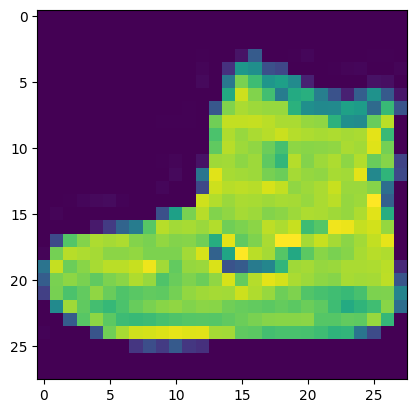

In [6]:
#plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [7]:
train_labels[0] #what label is this?

9

In [8]:
#we need the labels in human readable form

#create a small list so we can index onto our training labels so they are human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

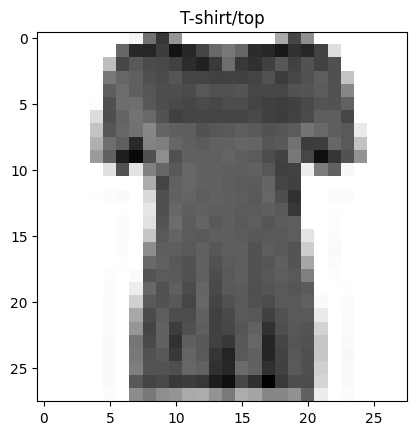

In [9]:
index_of_choice = 10
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

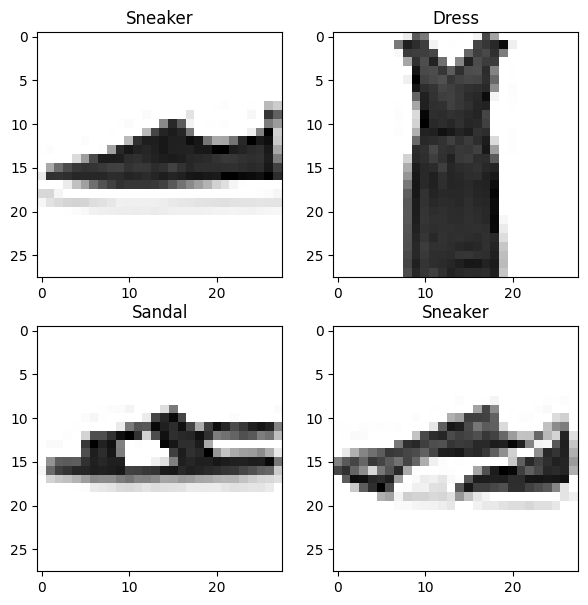

In [10]:
import random

plt.figure(figsize = (7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])


In [11]:
#lets build or pick a pre-trained model to suit our problem, building a multi class classification model

#for our multiclass classification model we can use a similar architecute to our binary classifiers however we are going to have to tweak a few things,
train_data[0].shape

(28, 28)

In [12]:
#output layer shape is one per class so it would be 10
#loss function is tf.keras.losses.CategoricalCrossentropy instead of BinaryCrossentropy
#output layer activation is softmax not sigmoid

In [13]:
train_data[0].shape

(28, 28)

In [14]:
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28))
])

flatten_model.output_shape #784,, 28*28 flattens the input, nueral networks like everything in one long vector, data flattened from 28, 28 to (None, 784)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(None, 784)

In [15]:
train_labels[:10] #our lables are integers, thers two loss functions for multiclass classification,

#CategoricalCrossentropy expects the labels to but one hot encoded
#SparseCategoricalCrossentropy allows the use of integers

#if want to use CategoricalCrossEntropy can use tf.one_hot(train_labels, depth = 10)

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [16]:
tf.random.set_seed(42)

#create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), #tells the
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

#compile the model
model_1.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy,
    optimizer= tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

#fit the model
non_norm_history = model_1.fit(train_data, train_labels, epochs = 10, validation_data=(test_data, test_labels)) #evaluate the model in real times to see how it does on unseen data


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1134 - loss: 2.6611 - val_accuracy: 0.1973 - val_loss: 2.0919
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2108 - loss: 1.9746 - val_accuracy: 0.2564 - val_loss: 1.7233
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2732 - loss: 1.7070 - val_accuracy: 0.3039 - val_loss: 1.6085
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3088 - loss: 1.6047 - val_accuracy: 0.3208 - val_loss: 1.5738
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3176 - loss: 1.5663 - val_accuracy: 0.3231 - val_loss: 1.5502
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3219 - loss: 1.5459 - val_accuracy: 0.3256 - val_loss: 1.5332
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3238 - loss: 1.5323 - val_accuracy: 0.3243 - val_loss: 1.5220
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3233 - loss: 1.5232 -

In [17]:
#val acc and val loss, validates itslef on the validation data and you can tell how the model will perform in the real world

#the model is better than guessing because geussing would be 10% accuracy

model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [18]:
#next step is to scale features nn's tend to prefer normalization

#check the min and max values of the training data
train_data.min(), train_data.max()

#neural networks prefer data to be scaled also known as normalized, numbers between 0 and 1,
#right now our data is between 0 and 255

(0, 255)

In [19]:
#we can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

#now its scaled between 0 and 1
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [21]:
#same model as model 1

tf.random.set_seed(42)

#create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

#fit the model
norm_history = model_2.fit(train_data_norm, train_labels, epochs = 10, validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3514 - loss: 1.6093 - val_accuracy: 0.6288 - val_loss: 1.0394
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6514 - loss: 0.9674 - val_accuracy: 0.6731 - val_loss: 0.8851
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6944 - loss: 0.8476 - val_accuracy: 0.6937 - val_loss: 0.8327
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7078 - loss: 0.7971 - val_accuracy: 0.7006 - val_loss: 0.8009
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7132 - loss: 0.7658 - val_accuracy: 0.7020 - val_loss: 0.7774
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7174 - loss: 0.7400 - val_accuracy: 0.7067 - val_loss: 0.7592
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7218 - loss: 0.7176 - val_accuracy: 0.7125 - val_loss: 0.7358
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7305 - loss: 0.6941 - 

<Axes: title={'center': 'normalized data'}>

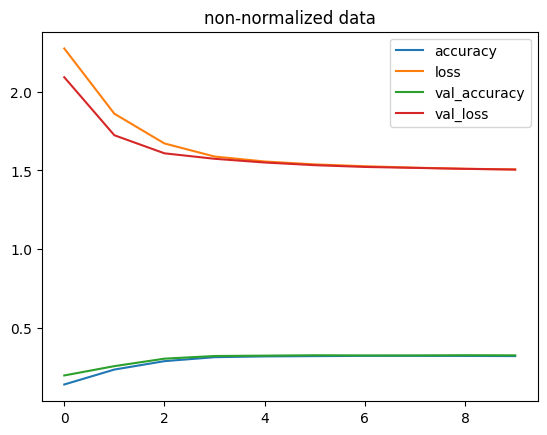

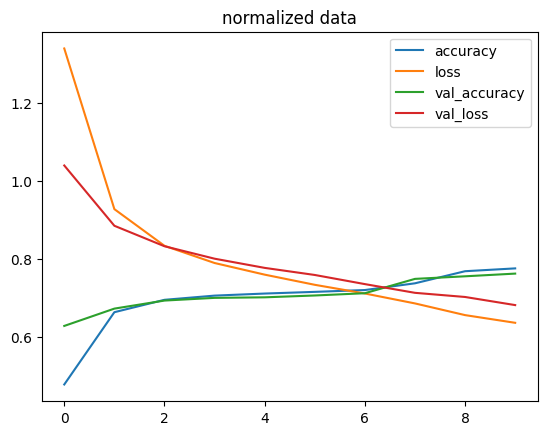

In [22]:
#dramatic increase in performance just from normalizing data between 0 and 1
import pandas as pd
#plot non normalized data
pd.DataFrame(non_norm_history.history).plot(title = "non-normalized data")

#plot normalized data
pd.DataFrame(norm_history.history).plot(title = "normalized data")

In [25]:
#model imporived much faster on normalized data and appears to have potential to continue improving if trained for longer


#the same model with even slightly different data can get dramatically different results
#compare models on same architecture different data, or same data different architecture

#lets find the ideal learning rate

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_3.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

#create the learning rate callback
ler_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 * 10**(epoch/20))

find_lr_history = model_3.fit(train_data_norm, train_labels, epochs = 40, validation_data = (test_data_norm, test_labels),
                              callbacks = [ler_scheduler])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4471 - loss: 1.5584 - val_accuracy: 0.7316 - val_loss: 0.8275 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7506 - loss: 0.7514 - val_accuracy: 0.7634 - val_loss: 0.6670 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7739 - loss: 0.6422 - val_accuracy: 0.7732 - val_loss: 0.6312 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7829 - loss: 0.6098 - val_accuracy: 0.7797 - val_loss: 0.6151 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7879 - loss: 0.5930 - val_accuracy: 0.7819 - val_loss: 0.6073 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7921 - loss: 0.5821 - val_accuracy: 0.7873 - val_loss: 0.6013 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7989 - l

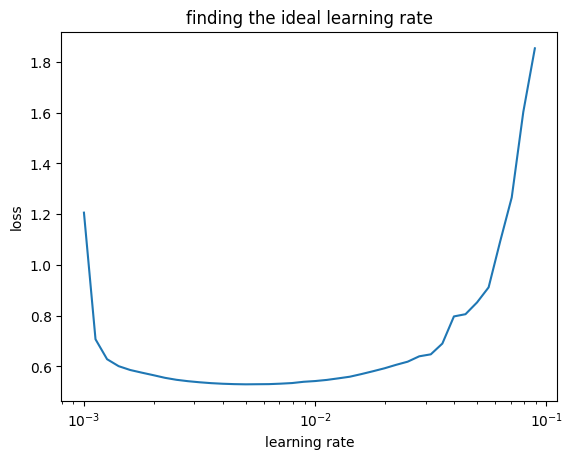

In [26]:
#plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("finding the ideal learning rate");

⬆ find the lowest point on the curve and then go back a little bit, 10-3 seems to be the best learning rate which is the defualt value for adam, lets refit a model with the ideal learning rate

In [31]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

#compile the model
model_4.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

#fit the model
history_4  =model_4.fit(train_data_norm, train_labels, epochs = 20, validation_data = (test_data_norm, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2195 - loss: 1.9865 - val_accuracy: 0.3334 - val_loss: 1.5897
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3448 - loss: 1.5270 - val_accuracy: 0.4487 - val_loss: 1.3956
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4609 - loss: 1.3543 - val_accuracy: 0.4688 - val_loss: 1.2747
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4925 - loss: 1.2506 - val_accuracy: 0.4962 - val_loss: 1.2108
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5233 - loss: 1.1915 - val_accuracy: 0.5361 - val_loss: 1.1605
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5519 - loss: 1.1388 - val_accuracy: 0.5498 - val_loss: 1.1197
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5614 - loss: 1.0990 - val_accuracy: 0.5515 - val_loss: 1.0949
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5705 - loss: 1.0708 - 

In [ ]:
#evaluate its performance
#asses some of its predictions with visualizations
#improve results by changing the architecture or training for longer
#save and load our model into an application

In [48]:
from sklearn.metrics import confusion_matrix
import itertools


def make_confusion_martix(y_true, y_pred, classes = None, figsize = (10, 10), text_size = 15):
  #create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)

  #lets get percentages of correct
  cm_norm = cm.astype("float")/cm.sum(axis = 1)[:, np.newaxis]
  n_classes = cm.shape[0]

  #lets prettify it
  figure, ax = plt.subplots()

  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  figure.colorbar(cax)

  #create classes

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  #label the axes
  ax.set(title = "confusion matrix",
        xlabel = "predicted label",
        ylabel = "true label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  #set x-axis labels to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #set the label sizes
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  #set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  #plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
            horizontalalignment = "center",
            color = "white" if cm[i, j] > threshold else "black",
            size = text_size)



In [33]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [34]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [35]:
#we need to make some predictions with our model
y_probs = model_4.predict(test_data_norm) #probs is short for predicted probablities

#view the first 5 predictions
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[1.8863053e-05, 2.6728426e-08, 5.3707196e-04, 3.7008767e-06,
        3.2867692e-04, 1.5369178e-01, 1.5086666e-04, 5.2882165e-01,
        1.2743510e-02, 3.0370381e-01],
       [9.3559816e-02, 3.0621325e-04, 2.9479137e-01, 2.5656607e-02,
        2.8984174e-01, 2.2107173e-12, 2.8348747e-01, 4.4607859e-37,
        1.2356737e-02, 0.0000000e+00],
       [3.1689703e-07, 9.9965894e-01, 2.3794498e-30, 3.4066816e-04,
        2.8654347e-25, 0.0000000e+00, 3.6820578e-17, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.8860468e-07, 9.9950546e-01, 2.2523269e-29, 4.9392472e-04,
        1.9099190e-24, 0.0000000e+00, 1.4023411e-16, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.2526779e-01, 4.8681552e-04, 2.5126636e-01, 3.6794499e-02,
        2.7228552e-01, 3.0815891e-15, 3.1102979e-01, 0.0000000e+00,
        2.8691264e-03, 0.0000000e+00]], dtype=float32)

🔑 remember to make predictions on the same kind of data trained on

In [36]:
y_probs[0] #the highest number here inicates the index that is most likely

array([1.8863053e-05, 2.6728426e-08, 5.3707196e-04, 3.7008767e-06,
       3.2867692e-04, 1.5369178e-01, 1.5086666e-04, 5.2882165e-01,
       1.2743510e-02, 3.0370381e-01], dtype=float32)

In [38]:
class_names[tf.argmax(y_probs[0])]

'Sneaker'

In [44]:
#convert all of the prediction probs into integers,

y_preds = y_probs.argmax(axis = 1)

In [45]:
y_preds[:10]

array([7, 2, 1, 1, 6, 1, 2, 2, 5, 7])

In [41]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [46]:
confusion_matrix(y_true = test_labels, y_pred = y_preds)

array([[764,   0,  29,  45,   0,   1, 138,   0,  23,   0],
       [ 17, 940,   8,  22,   0,   0,  11,   0,   2,   0],
       [ 24,   0, 767,   2,   0,   1, 167,   0,  39,   0],
       [327,  59,  22, 472,   0,   1, 106,   0,  12,   1],
       [ 32,   0, 579,   3,   0,   2, 364,   0,  20,   0],
       [  0,   0,   0,   0,   0, 874,   0,  88,  18,  20],
       [223,   0, 386,   7,   0,   1, 335,   0,  48,   0],
       [  0,   0,   0,   0,   0, 170,   0, 768,   0,  62],
       [  5,   0,  27,   1,   0,  41,  10,   2, 912,   2],
       [  0,   0,   0,   0,   0,   4,   0,  81,   1, 914]])

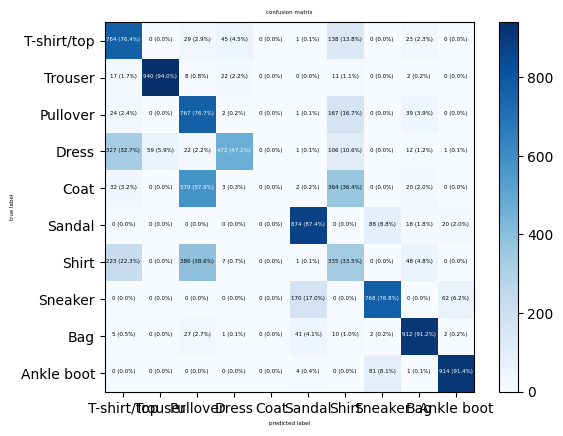

In [54]:
#lets make a prettier confusion matrix
make_confusion_martix(y_true = test_labels,
                      y_pred = y_preds,
                      classes = class_names,
                      figsize = (15, 15),
                      text_size = 4
                      )

In [ ]:
#assess some of its predictions with visualizations

#often when working with images and other forms of visual data its a good idea to visualize as much as possible to get a better understanding of the data, the inputs and outputs of the models

#lets create a fun little function to plot a random image make a prediction and label the plot with the truth label and predicted label

In [55]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  picks a random image, plots it and labels it with a predicted truth label
  """
  #set up a random integer
  i = random.randint(0, len(images))

  #create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  #plot the image
  plt.imshow(target_image, cmap = plt.cm.binary)

  #change the color of the titles depending if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  #add xlabel information
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color = color) #set the color depending if the prediction is right or wrong

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


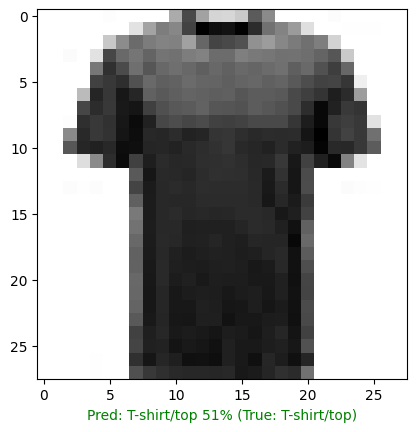

In [93]:
plot_random_image(model = model_4, images = test_data_norm, true_labels = test_labels, classes = class_names)

*cracking open our tensorflow model*

In [94]:
#what patterns exactly is our model learning

#what are the patterns that our model is learning?
#each layer has a specific role in finding patterns in the data

model_4.layers

[<Flatten name=flatten_10, built=True>,
 <Dense name=dense_24, built=True>,
 <Dense name=dense_25, built=True>,
 <Dense name=dense_26, built=True>]

In [95]:
model_4.layers[1] #first layer

<Dense name=dense_24, built=True>

In [106]:
#get the patterns of a layer in our network
weights, biases = model_4.layers[1].get_weights()

In [107]:
weights, weights.shape

(array([[ 0.09537234,  0.6962339 ,  0.58584684,  0.16874722],
        [-0.46276742,  1.2244399 ,  0.1067953 ,  0.36331156],
        [ 0.2345438 ,  0.09555156,  1.0716017 ,  0.25956437],
        ...,
        [-0.22995591,  0.50727975,  0.22384068,  0.11303718],
        [-0.01575929,  0.39920187, -0.14374237,  0.45481068],
        [-0.02063142,  1.1432091 , -0.17122294,  0.42382205]],
       dtype=float32),
 (784, 4))

In [ ]:
#784 inputs, with 4 neurons inside the layer

In [108]:
#at the beginninng weights are complely random, does this using the kernel initalization parametr uses "glorot randomness" a form of randomness

#now lets check  out the bias vector
biases, biases.shape

(array([1.1763663, 2.480038 , 1.670986 , 1.0090859], dtype=float32), (4,))

In [ ]:
#a weights matrix has one value per data point
#each bias vector is paired with a weights matrix, bias is initialized as zeroes
#at least in the case of a tensorflow dense layer

#the bias vector dictates how much the patterns within the corresponding weights matrix will infuluence the next layer

In [109]:
model_4.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [ ]:
#for each layer the previous layer is its input, does its part to find patterns in the data and passes it on to the next layer

In [110]:
#lets check out another way of viewing our deep learning model
from tensorflow.keras.utils import plot_model

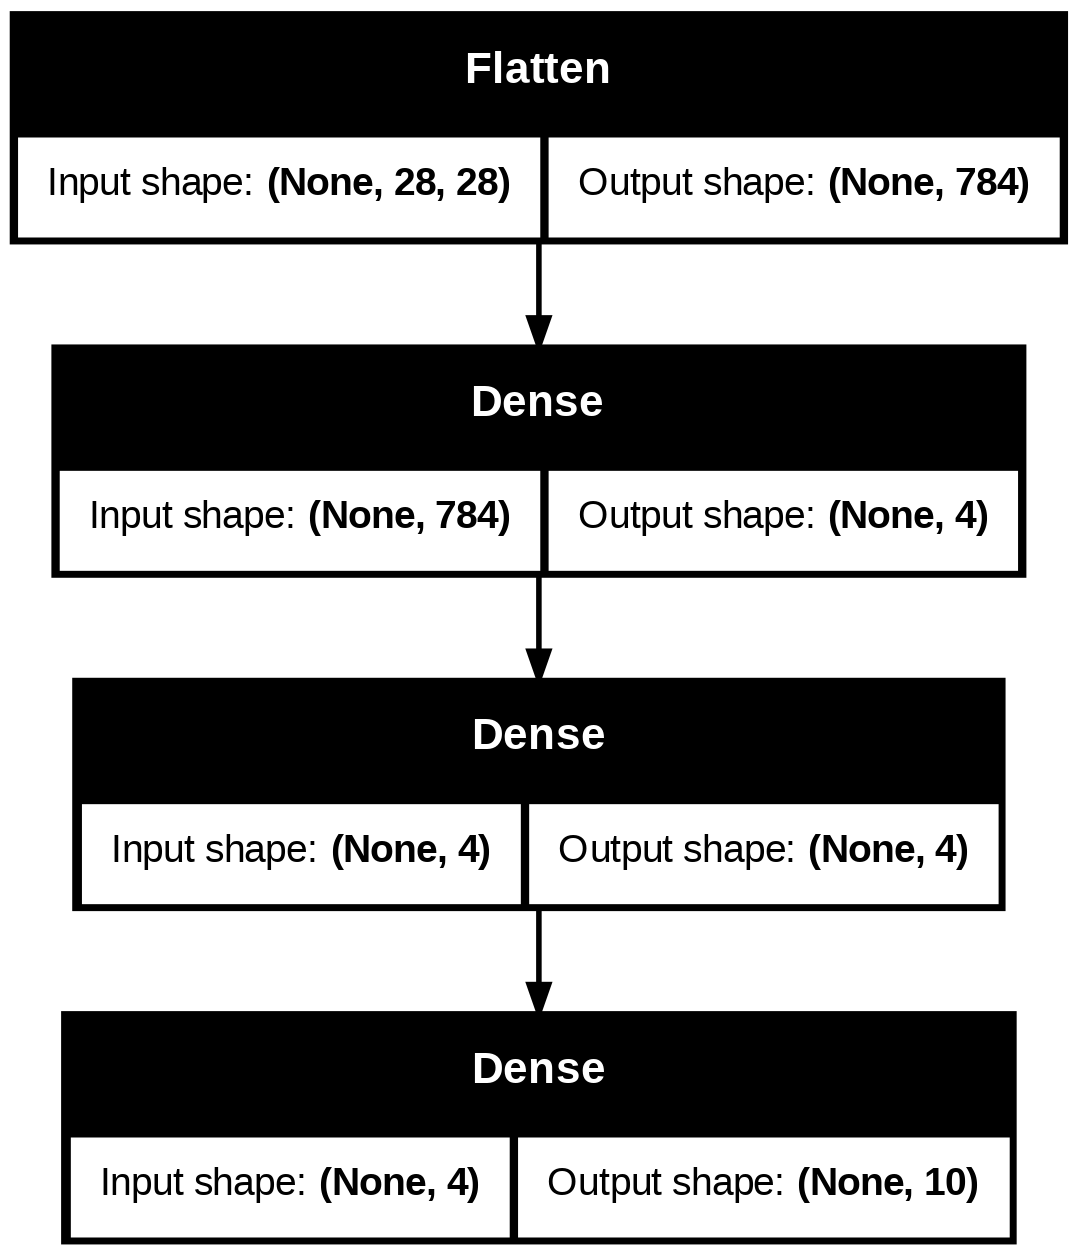

In [111]:
plot_model(model_4, show_shapes = True)

In [ ]:
#next check out exercises and extra ciriculum...